In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy, scipy.io

In [14]:
matfile=scipy.io.loadmat('test_8AFC_Contrast_Binocular_SaccadeResp_VisualFieldTest_v2_07102019_154613.mat')

In [19]:
contrast_levels=matfile['pFunc'][0][0] [0][0][1][0][:-1]
contrast_corr=matfile['pFunc'][0][0][0][0][0][0]

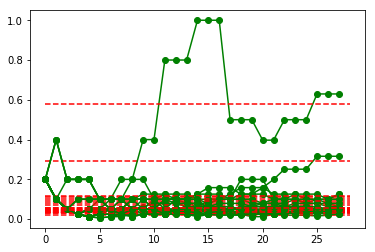

In [5]:
all_thresholds=np.zeros( (3,8))

for which_ecc in [0,1,2]:
    for which_angle in range(8):

        plot( matfile['pFunc'][which_ecc][which_angle] [0][0][1][0], 'go-' )
        #plot( matfile['pFunc'][1][2] [0][0][1][0], 'ro-' )
        #plot( matfile['pFunc'][2][2] [0][0][1][0], 'bo-' )

        running_thresh=matfile['pFunc'][which_ecc][which_angle] [0][0][1][0]

        thresh_guess=np.mean( running_thresh[-5:] )

        plt.plot( [0,28], [thresh_guess, thresh_guess], 'r--' )
        
        all_thresholds[which_ecc,which_angle]=thresh_guess

In [15]:
all_thresholds

array([[0.03636265, 0.11035702, 0.29021212, 0.02011737, 0.03636265,
        0.04630914, 0.57767762, 0.10106507],
       [0.04372602, 0.03481529, 0.08027884, 0.05053254, 0.04382985,
        0.02895247, 0.0727253 , 0.05530953],
       [0.03025017, 0.09177313, 0.11553552, 0.05517851, 0.04013942,
        0.03644899, 0.04382985, 0.05776776]])

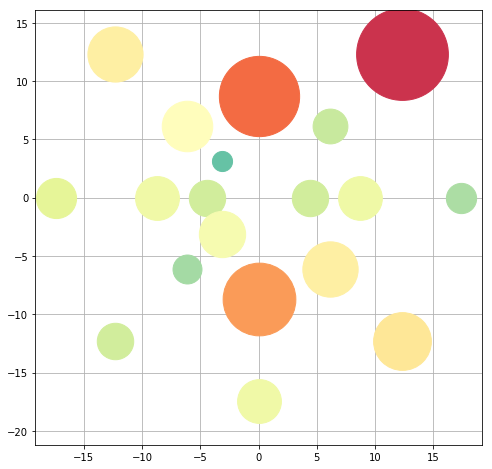

In [16]:
cm=matplotlib.cm.Spectral_r

eccs=[4.4,8.7,17.4]

plt.figure(figsize=(8,8))
for which_ecc in [0,1,2]:
    for which_angle_idx in range(8):
        which_angle=np.pi/4. * which_angle_idx
        radius=eccs[which_ecc]
        this_thresh=all_thresholds[which_ecc,which_angle_idx]
        if this_thresh>0.1:
            continue
        plt.plot( radius * cos(which_angle), radius * sin(which_angle), 'go', ms=this_thresh*1000, color=cm(this_thresh*10.0) )
plt.axis("equal")        
plt.grid()

In [18]:
matfile['pFunc'][0][1]

array([[(array([[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 0]], dtype=uint8), array([[0.2       , 0.1       , 0.05      , 0.025     , 0.0125    ,
        0.025     , 0.025     , 0.05      , 0.05      , 0.05      ,
        0.025     , 0.05      , 0.05      , 0.05      , 0.03971641,
        0.05      , 0.05      , 0.05      , 0.03971641, 0.05      ,
        0.05      , 0.05      , 0.03971641, 0.03971641, 0.05      ,
        0.05      , 0.05      , 0.06294627]]), array([[1]], dtype=uint8), array([[1.25892541]]), array([[9]], dtype=uint8), array([[0.025     , 0.025     , 0.05      , 0.03971641, 0.05      ,
        0.03971641, 0.05      , 0.03971641, 0.05      , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]]), array([[28]], dtype=uint8), array([[1]]

In [47]:
matfile['Results'][350][0:18].squeeze()

array([array([[351]], dtype=uint16), array([[1]], dtype=uint8),
       array([[1]], dtype=uint8), array([[4.4]]),
       array([[0]], dtype=uint8), array([[2]], dtype=uint8),
       array([[122.7006678]]), array([[0]], dtype=uint8),
       array([[260.13445304]]), array([[0.05]]), array([[0.025]]),
       array([[0]], dtype=uint8), array([[2]], dtype=uint8),
       array([[0.050214]]), array([[1]], dtype=uint8),
       array([[1]], dtype=uint8), array([[1271.90002441]]),
       array([[602.09997559]])], dtype=object)

In [59]:
def foo_bar(x):
    return x[0][0]

In [50]:
import pandas as pd

In [74]:
df=pd.DataFrame(np.array(matfile['Results'][:,0:18].squeeze()),columns=[chr(ord('a')+n) for n in range(18)])
df=df.applymap(foo_bar)

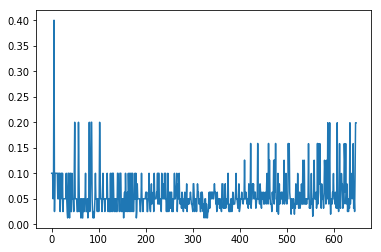

In [65]:
plt.plot(df[9])

In [75]:
df

a  b  c     d    e  f             g             h            i  \
0      1  1  7   4.4  270  2 -2.253975e-14 -1.227007e+02   342.970114   
1      2  1  4   4.4  135  2 -8.676247e+01  8.676247e+01   156.853133   
2      3  1  3   4.4   90  2  7.513249e-15  1.227007e+02   229.708776   
3      4  1  7   4.4  270  2 -2.253975e-14 -1.227007e+02   342.970114   
4      5  2  6   8.7  225  2 -1.715531e+02 -1.715531e+02   186.394030   
5      6  3  3  17.4   90  2  2.971148e-14  4.852254e+02   514.312562   
6      7  1  7   4.4  270  2 -2.253975e-14 -1.227007e+02   342.970114   
7      8  2  3   8.7   90  2  1.485574e-14  2.426127e+02   397.475456   
8      9  1  6   4.4  225  2 -8.676247e+01 -8.676247e+01   155.503510   
9     10  3  5  17.4  180  2 -4.852254e+02  5.942297e-14   236.434962   
10    11  2  7   8.7  270  2 -4.456723e-14 -2.426127e+02   340.337100   
11    12  3  2  17.4   45  2  3.431061e+02  3.431061e+02   303.079461   
12    13  1  5   4.4  180  2 -1.227007e+02  1.502650e-14   137.390144   
13    14  2  3   8.7   90  2  1.485574e-14  2.426127e+02   397.475456   
14    15  2  4   8.7  135  2 -1.715531e+02  1.715531e+02   272.892380   
15    16  1  7   4.4  270  2 -2.253975e-14 -1.227007e+02   342.970114   
16    17  2  5   8.7  180  2 -2.426127e+02  2.971148e-14   156.844033   
17    18  1  8   4.4  315  2  8.676247e+01 -8.676247e+01   236.403375   
18    19  2  3   8.7   90  2  1.485574e-14  2.426127e+02   397.475456   
19    20  1  3   4.4   90  2  7.513249e-15  1.227007e+02   229.708776   
20    21  3  7  17.4  270  2 -8.913445e-14 -4.852254e+02   335.211440   
21    22  1  2   4.4   45  2  8.676247e+01  8.676247e+01   167.504135   
22    23  3  7  17.4  270  2 -8.913445e-14 -4.852254e+02   335.211440   
23    24  2  8   8.7  315  2  1.715531e+02 -1.715531e+02   166.374043   
24    25  3  7  17.4  270  2 -8.913445e-14 -4.852254e+02   335.211440   
25    26  2  5   8.7  180  2 -2.426127e+02  2.971148e-14   156.844033   
26    27  1  6   4.4  225  2 -8.676247e+01 -8.676247e+01   155.503510   
27    28  2  8   8.7  315  2  1.715531e+02 -1.715531e+02   166.374043   
28    29  1  5   4.4  180  2 -1.227007e+02  1.502650e-14   137.390144   
29    30  3  5  17.4  180  2 -4.852254e+02  5.942297e-14   236.434962   
..   ... .. ..   ...  ... ..           ...           ...          ...   
618  619  3  3  17.4   90  2  2.971148e-14  4.852254e+02   514.312562   
619  620  3  7  17.4  270  2 -8.913445e-14 -4.852254e+02   335.211440   
620  621  2  7   8.7  270  2 -4.456723e-14 -2.426127e+02   340.337100   
621  622  1  6   4.4  225  2 -8.676247e+01 -8.676247e+01   155.503510   
622  623  1  3   4.4   90  2  7.513249e-15  1.227007e+02   229.708776   
623  624  3  8  17.4  315  2  3.431061e+02 -3.431061e+02  1249.984333   
624  625  1  2   4.4   45  2  8.676247e+01  8.676247e+01   167.504135   
625  626  1  7   4.4  270  2 -2.253975e-14 -1.227007e+02   342.970114   
626  627  1  5   4.4  180  2 -1.227007e+02  1.502650e-14   137.390144   
627  628  2  8   8.7  315  2  1.715531e+02 -1.715531e+02   166.374043   
628  629  1  8   4.4  315  2  8.676247e+01 -8.676247e+01   236.403375   
629  630  1  1   4.4    0  2  1.227007e+02  0.000000e+00   260.134453   
630  631  3  1  17.4    0  2  4.852254e+02  0.000000e+00   220.919359   
631  632  2  1   8.7    0  2  2.426127e+02  0.000000e+00   184.950341   
632  633  3  6  17.4  225  2 -3.431061e+02 -3.431061e+02   276.239722   
633  634  3  1  17.4    0  2  4.852254e+02  0.000000e+00   220.919359   
634  635  1  3   4.4   90  2  7.513249e-15  1.227007e+02   229.708776   
635  636  2  4   8.7  135  2 -1.715531e+02  1.715531e+02   272.892380   
636  637  3  5  17.4  180  2 -4.852254e+02  5.942297e-14   236.434962   
637  638  3  5  17.4  180  2 -4.852254e+02  5.942297e-14   236.434962   
638  639  3  2  17.4   45  2  3.431061e+02  3.431061e+02   303.079461   
639  640  3  6  17.4  225  2 -3.431061e+02 -3.431061e+02   276.239722   
640  641  3  2  17.4   45  2  3.431061e+02  3.431061e+02   303.07

In [89]:
df.query('b==3 & c==8')[['m','k']]

m         k
43   8  0.200000
67   8  0.100000
72   4  0.050000
80   1  0.100000
84   8  0.200000
85   8  0.200000
109  8  0.200000
163  8  0.100000
166  8  0.100000
176  8  0.100000
196  8  0.050000
240  3  0.050000
242  8  0.100000
271  8  0.100000
346  8  0.100000
369  8  0.079433
375  1  0.079433
410  1  0.100000
423  5  0.125893
438  8  0.158489
461  8  0.158489
463  8  0.158489
474  8  0.125893
476  1  0.125893
503  8  0.158489
565  8  0.158489
623  8  0.158489

In [85]:
df.query('b==1 & c==6')[['m','k']]

m         k
8    6  0.200000
26   6  0.100000
69   6  0.050000
78   1  0.025000
95   6  0.050000
112  6  0.050000
123  6  0.050000
165  6  0.025000
178  3  0.025000
200  1  0.050000
216  6  0.062946
236  6  0.062946
289  6  0.062946
306  6  0.050000
309  6  0.050000
404  8  0.050000
413  6  0.062946
433  6  0.062946
439  6  0.062946
440  6  0.050000
489  6  0.050000
526  6  0.050000
549  6  0.039716
613  6  0.039716
614  6  0.039716
621  4  0.031548
643  5  0.039716

In [86]:
df.query('b==2 & c==3')[['m','k']]

m         k
7    3  0.200000
13   3  0.100000
18   3  0.050000
37   1  0.025000
111  3  0.050000
151  3  0.050000
194  3  0.050000
197  5  0.025000
199  3  0.050000
223  1  0.050000
224  3  0.062946
250  3  0.062946
265  1  0.062946
287  3  0.079245
310  3  0.079245
311  3  0.079245
318  3  0.062946
347  3  0.062946
364  2  0.062946
429  3  0.079245
457  3  0.079245
458  6  0.079245
481  3  0.099763
494  1  0.099763
584  3  0.125594
590  3  0.125594
645  3  0.125594

In [87]:
df.query('b==2 & c==4')[['m','k']]

m         k
14   4  0.200000
101  4  0.100000
120  4  0.050000
149  5  0.025000
173  4  0.050000
177  1  0.050000
225  4  0.100000
266  4  0.100000
315  4  0.100000
326  4  0.050000
358  4  0.050000
361  4  0.050000
380  4  0.025000
383  4  0.025000
409  6  0.025000
416  4  0.050000
431  4  0.050000
473  4  0.050000
496  1  0.039716
510  4  0.050000
524  4  0.050000
539  4  0.050000
553  4  0.039716
586  5  0.039716
601  4  0.050000
611  4  0.050000
635  4  0.050000